# Demonstration of "parameter"-related class

This notebook demonstrates the functionalities of "parameter"-related classes. The detailed documentation of these classes is [here](https://pyseismosoil.readthedocs.io/en/stable/api_docs/class_parameters.html).

_This notebook takes about 10 minutes to read through._

## 1. Import relevant libraries

In [1]:
import numpy as np

In [2]:
from PySeismoSoil.class_parameters import (
    HH_Param,
    MKZ_Param,
    HH_Param_Multi_Layer,
    MKZ_Param_Multi_Layer,
)

## 2. Demonstration of `HH_Param` objects

### 2.1. Initialization

In [3]:
hh_param = HH_Param(
    dict(gamma_t=1, a=2, gamma_ref=3, beta=4, s=5, Gmax=6, mu=7, Tmax=8, d=9)
)

In [4]:
print(hh_param)

{
  gamma_t: 1,
  a: 2,
  gamma_ref: 3,
  beta: 4,
  s: 5,
  Gmax: 6,
  mu: 7,
  Tmax: 8,
  d: 9
}


`HH_Param` objects have `dict`-like behaviors. The only exception is that you cannot delete items (i.e., use `pop()` or `popitem()`).

In [5]:
hh_param['beta']

4

In [6]:
'Gmax' in hh_param

True

In [7]:
len(hh_param)

9

In [8]:
hh_param.allowable_keys

{'Gmax', 'Tmax', 'a', 'beta', 'd', 'gamma_ref', 'gamma_t', 'mu', 's'}

In [9]:
for k, v in hh_param.items():
    print('%12s = %.1f' % (k, v))

     gamma_t = 1.0
           a = 2.0
   gamma_ref = 3.0
        beta = 4.0
           s = 5.0
        Gmax = 6.0
          mu = 7.0
        Tmax = 8.0
           d = 9.0


### 2.2. Manipulating

In [10]:
hh_param.serialize()  # the outputs are arrange a pre-defined order

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
hh_param.get_GGmax()

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999998,
       0.99999998, 0.99999997, 0.99999996, 0.99999995, 0.99999993,
       0.99999991, 0.99999988, 0.99999984, 0.99999979, 0.99999971,
       0.99999962, 0.99999949, 0.99999931, 0.99999905, 0.99999869])

In [12]:
hh_param.get_damping()

array([1.41357986e-14, 2.07089449e-11, 4.30576425e-11, 6.88554749e-11,
       1.00194540e-10, 1.39506196e-10, 1.90027540e-10, 2.55716596e-10,
       3.41888425e-10, 4.55413023e-10, 6.05365574e-10, 8.03789779e-10,
       1.06653187e-09, 1.41461177e-09, 1.87590529e-09, 2.48730685e-09,
       3.29775459e-09, 4.37210355e-09, 5.79631353e-09, 7.68437560e-09,
       1.01873873e-08, 1.35056105e-08, 1.79046145e-08, 2.37364230e-08,
       3.14677295e-08, 4.17172437e-08, 5.53052800e-08, 7.33193481e-08,
       9.72012002e-08, 1.28862661e-07, 1.70838575e-07, 2.26490465e-07,
       3.00276804e-07, 3.98112390e-07, 5.27846919e-07, 6.99903760e-07,
       9.28135699e-07, 1.23097688e-06, 1.63300642e-06, 2.16709358e-06,
       2.87738928e-06, 3.82358998e-06, 5.08719372e-06, 6.78101431e-06,
       9.06426495e-06, 1.21675532e-05, 1.64361331e-05, 2.24077133e-05,
       3.09570321e-05, 4.35713404e-05])

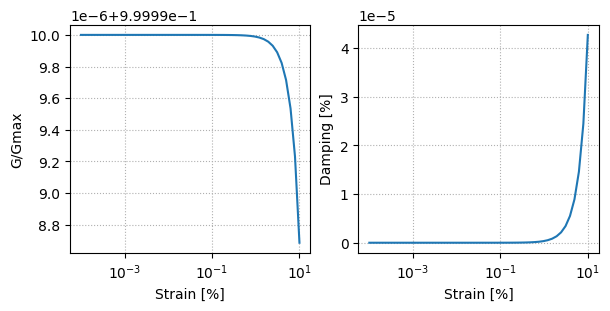

In [13]:
# the parameter values are arbitrary, so the curves don't make sense
hh_param.plot_curves();

## 3. Demonstration of `MKZ_Param` objects

The behaviors of `MKZ_Param` are very similar to `HH_Param`, so we won't discuss them in details here.

In [14]:
mkz_param = MKZ_Param(dict(gamma_ref=3, beta=4, s=5, Gmax=6))

In [15]:
print(mkz_param)

{
  gamma_ref: 3,
  beta: 4,
  s: 5,
  Gmax: 6
}


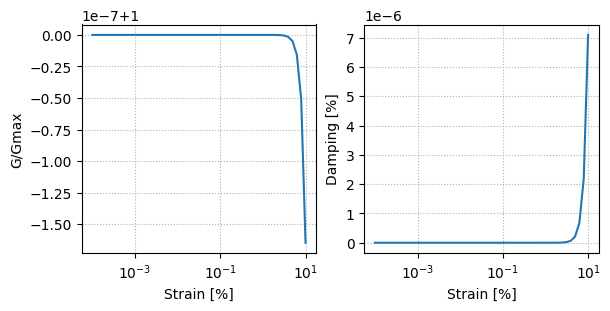

In [16]:
mkz_param.plot_curves();

## 4. Demonstration of `HH_Param_Multi_Layer` objects

This is a compound class that contains multiple layers of `HH_Param` objects.

### 4.1. Initialize with a list

You can initialize it with a list of `dict` or a list of `HH_Param`:

In [17]:
list_1 = [
    dict(gamma_t=1, a=2, gamma_ref=3, beta=4, s=5, Gmax=6, mu=7, Tmax=8, d=9),
    dict(gamma_t=1, a=2, gamma_ref=3, beta=4, s=5, Gmax=6, mu=7, Tmax=8, d=9),
    dict(gamma_t=1, a=2, gamma_ref=3, beta=4, s=5, Gmax=6, mu=7, Tmax=8, d=9),
]
hh_params = HH_Param_Multi_Layer(list_1)

In [18]:
hh_params.n_layer

3

In [19]:
hh_params.param_list

[{
   gamma_t: 1,
   a: 2,
   gamma_ref: 3,
   beta: 4,
   s: 5,
   Gmax: 6,
   mu: 7,
   Tmax: 8,
   d: 9
 },
 {
   gamma_t: 1,
   a: 2,
   gamma_ref: 3,
   beta: 4,
   s: 5,
   Gmax: 6,
   mu: 7,
   Tmax: 8,
   d: 9
 },
 {
   gamma_t: 1,
   a: 2,
   gamma_ref: 3,
   beta: 4,
   s: 5,
   Gmax: 6,
   mu: 7,
   Tmax: 8,
   d: 9
 }]

### 4.2. Initialize from a text file

The text file needs contain at least one column and exactly nine rows, each for a HH parameter. The meanings of the rows should be in this order: `gamma_t, a, gamma_ref, beta, s, Gmax, mu, Tmax, d`.

In [20]:
hh_params = HH_Param_Multi_Layer('../tests/files/HH_G_FKSH14.txt')

In [21]:
hh_params.n_layer

5

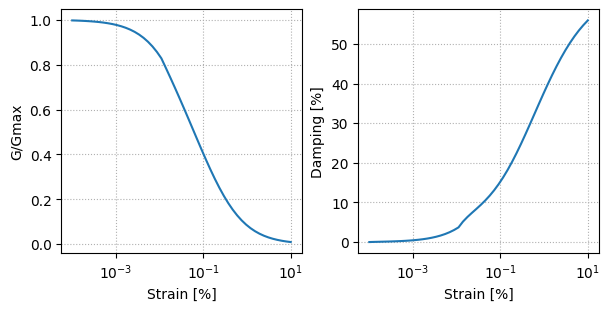

In [22]:
# The damping curve doesn't make sense b/c these parameters are for G/Gmax only
hh_params[2].plot_curves();

### 4.3. Construct a "curve matrix" from the object

In [23]:
ggmax_curves, damping_curves = hh_params.construct_curves()
np.set_printoptions(precision=4, suppress=True, linewidth=100)
ggmax_curves.get_curve_matrix()[:10, :8]

array([[0.01  , 0.7411, 0.01  , 1.    , 0.01  , 0.7989, 0.01  , 1.    ],
       [0.0115, 0.7155, 0.0115, 1.    , 0.0115, 0.7773, 0.0115, 1.    ],
       [0.0133, 0.6884, 0.0133, 1.    , 0.0133, 0.7541, 0.0133, 1.    ],
       [0.0153, 0.6599, 0.0153, 1.    , 0.0153, 0.7293, 0.0153, 1.    ],
       [0.0176, 0.6303, 0.0176, 1.    , 0.0176, 0.703 , 0.0176, 1.    ],
       [0.0202, 0.5996, 0.0202, 1.    , 0.0202, 0.6752, 0.0202, 1.    ],
       [0.0233, 0.5682, 0.0233, 1.    , 0.0233, 0.6462, 0.0233, 1.    ],
       [0.0268, 0.5361, 0.0268, 1.    , 0.0268, 0.616 , 0.0268, 1.    ],
       [0.0309, 0.5038, 0.0309, 1.    , 0.0309, 0.585 , 0.0309, 1.    ],
       [0.0356, 0.4715, 0.0356, 1.    , 0.0356, 0.5532, 0.0356, 1.    ]])

### 4.4. Serialize to a 2D array

Each column represents a soil layer; each row represent a parameter (in this order: `gamma_t`, `a`, `gamma_ref`, `beta`, `s`, `Gmax`, `mu`, `Tmax`, `d`).

In [24]:
hh_params.serialize_to_2D_array()

array([[7.6244e-04, 1.3975e-03, 1.1031e-04, 1.0412e-04, 1.0717e-04],
       [1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02],
       [3.1406e-04, 4.4874e-04, 6.0826e-04, 8.3719e-04, 9.4077e-04],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [9.1900e-01, 9.1900e-01, 9.1900e-01, 9.1900e-01, 9.1900e-01],
       [2.6926e+07, 6.7001e+07, 1.4638e+08, 2.4131e+09, 3.3748e+09],
       [2.0625e-01, 2.1133e-01, 2.5788e-01, 1.0000e+00, 1.0000e+00],
       [2.7822e+04, 6.5842e+04, 1.4871e+05, 8.1562e+05, 1.1326e+06],
       [9.0879e-01, 8.9794e-01, 8.6176e-01, 9.8116e-01, 9.7754e-01]])

You can save this 2D array as a text file via the `save_txt()` method (see the documentation for details).

The behaviors of `MKZ_Param_Multi_Layer` is identical to `HH_Param_Multi_Layer`, so we won't go into the details here.